https://pythonprogramminglanguage.com/kmeans-text-clustering/

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

from nltk.corpus import stopwords

In [2]:
import pandas as pd

colunas = ['ROTULO_MANUAL', 'EMENTA_NORM']

df = pd.read_csv('../../data/ementas_pre-processadas.csv', header=0, sep=',', quotechar='"', usecols=colunas)

In [3]:
documents = df['EMENTA_NORM']

In [4]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(documents.values.astype('U'))

In [5]:
true_k = 5
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=5, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 sentenca
 coletiva
 publica
 acao
 banco
 recurso
 cumprimento
 civil
 expurgos
 liquidacao
Cluster 1:
 embargos
 declaracao
 omissao
 art
 aclaratorios
 rejeitados
 acordao
 rediscussao
 prequestionamento
 materia
Cluster 2:
 rejeicao
 artigo
 requisitos
 declaracao
 processo
 embargos
 codigo
 civil
 ausencia
 caracterizada
Cluster 3:
 recurso
 sentenca
 art
 acoes
 contrato
 acao
 codigo
 civil
 apelacao
 conhecido
Cluster 4:
 embargos
 obscuridade
 contradicao
 omissao
 declaracao
 erro
 material
 prequestionamento
 rediscussao
 materia


In [7]:
Y = vectorizer.transform(df['EMENTA_NORM'].values.astype('U'))
prediction = model.predict(Y)
df['PREDICTION'] = prediction

In [8]:
df['ROTULO'] = df['ROTULO_MANUAL'].astype("category").cat.codes
df.head()

,ROTULO_MANUAL,EMENTA_NORM,PREDICTION,ROTULO
0,CDC,embargos declaracao pretendida rediscussao que...,1,3
1,CDC,apelacao civel acao declaratoria cc repeticao ...,3,3
2,CDC,embargos declaracao suscitacao contradicao err...,1,3
3,DAN,apelacao civel acao indenizacao danos morais c...,3,7
4,DAN,apelacao civel acao indenizatoria danos materi...,3,7


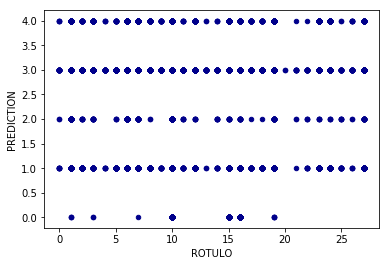

In [10]:
df.plot.scatter(x='ROTULO', y='PREDICTION', c='DarkBlue')